# Исследование интернет магазина  компьютерных игр

**Цель исследования:**
Проанализировать имеющиеся данные для прогноза на 2017 год.

**Описание данных:**
Данные взяты из открытых источников.

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**План работы**:
**1. Импортировать библиотеки. Загрузить датафреймы. Изучить общую информацию.**

**2. Предобработка данных:**
* приведение к нижнему регистру названий столбцов
* преобразование данных в нужные типы
* проверка на пропуски и дубликаты
* создание нового столбца с суммарными продажами во всех регионах .

**3. Исследовательский анализ данных**
* посмотреть сколько игр выпускалось в разные годы;
* посмотреть, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. В результате, выбрать актуальный период с которым работать дальше;
* проанализировать какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.;
* построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам;
* проанализировать, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков;
* построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. соотнести выводы с продажами игр на других платформах;
* посмотреть на общее распределение игр по жанрам.


**4. Портрет пользователя каждого региона**

Определить для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5).
* Самые популярные жанры (топ-5).
* Влияет ли рейтинг ESRB на продажи в отдельном регионе

**6. Проверка гипотез**
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action и Sports разные.

## шаг. Знакомство с данными

Импортирую нужные библиотеки, открываю файл с данными и посмотрю общую информацию

In [1]:
!pip install missingno

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import missingno as msno

In [3]:
data = pd.read_csv('/datasets/games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Промежуточный вывод**: данные нуждаются в предобработке.

## шаг. Предобработка данных

Подготовим данные

Начнём с замены названия столбцов (приведём к нижнему регистру);

In [5]:
data.columns = [col.lower() for col in data.columns]
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Теперь преобразую данные в нужные типы. Поменяю:
* year_of_release float64  должен быть int, год это всегда целое число
* user_score object должен быть float, так как у нас дроюное число, а не текст

In [6]:
data['year_of_release'] = data['year_of_release'].astype('Int32')
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce').astype('float32')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int32  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float32
 10  rating           9949 non-null   object 
dtypes: Int32(1), float32(1), float64(5), object(4)
memory usage: 1.3+ MB


Теперь дубликаты, сначала удалим явные. После применения drop_duplicates() число строк не изменилось, явных дубликатов не было.

In [7]:
data = data.drop_duplicates().reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int32  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float32
 10  rating           9949 non-null   object 
dtypes: Int32(1), float32(1), float64(5), object(4)
memory usage: 1.3+ MB


Приступим к обработке пропусков. У нас есть незначительное количество пропусков в year_of_release. Нам этот столбец нужен будет для анализа, поэтому решила не заполнять, а дропнуть, число незначительное.
Очень много пропусков во всех видах рейтингов. Видимо не у всех он есть, но может дело в технической проблеме со сбором этой информации, потому что чаще всего пропуски по трём колонкам сразу в одних и тех же играх. В дальнейшем они нам понадобятся для анализа, поэтому я не буду заполнять значения медианой, чтобы не исказить данные. Дропать не буду, потому что это примерно половина данных.

В задании было указано:
Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать; 
Но у нас нет этой аббревиатуры, я проверила ниже.

In [8]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,1.600000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.300000
user_score,54.600000


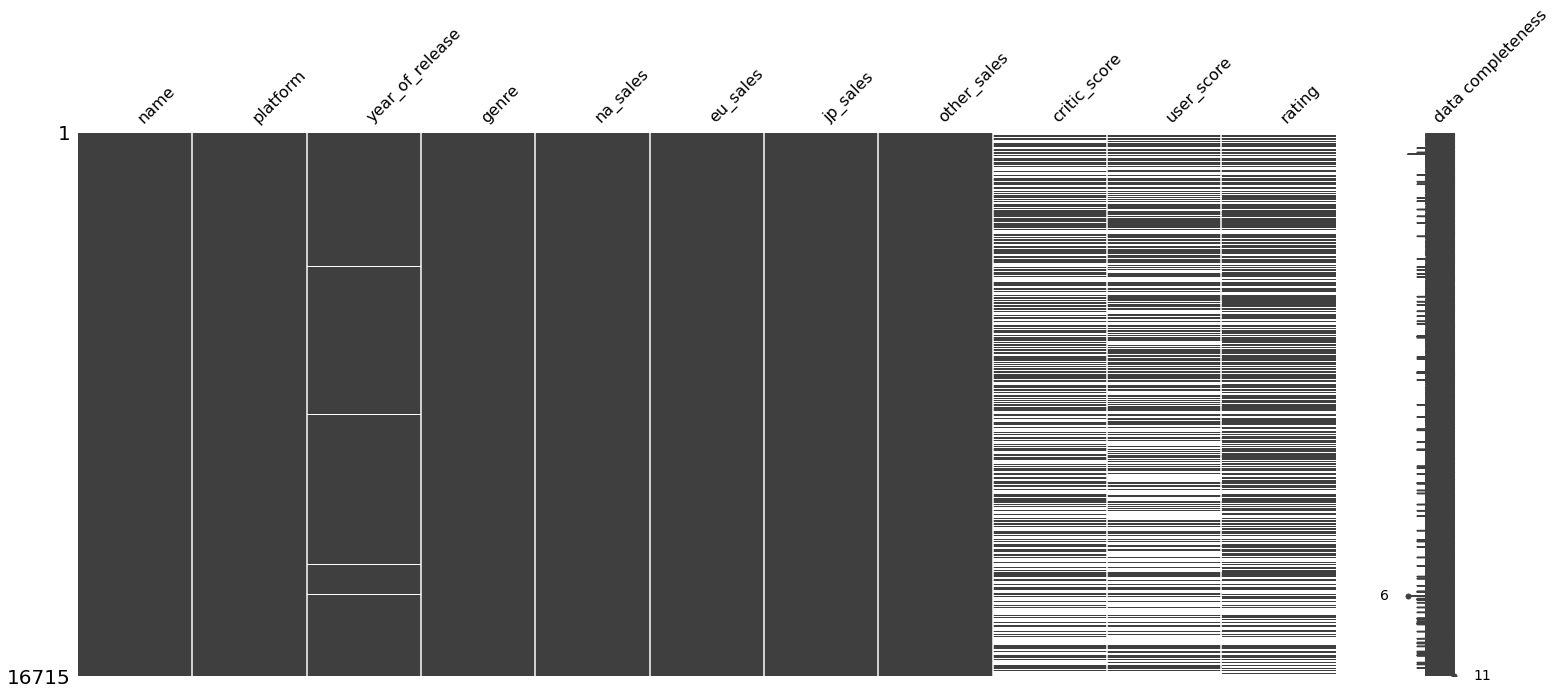

In [9]:
msno.matrix(data, labels=True);

In [10]:
data = data.dropna(subset=['year_of_release'])

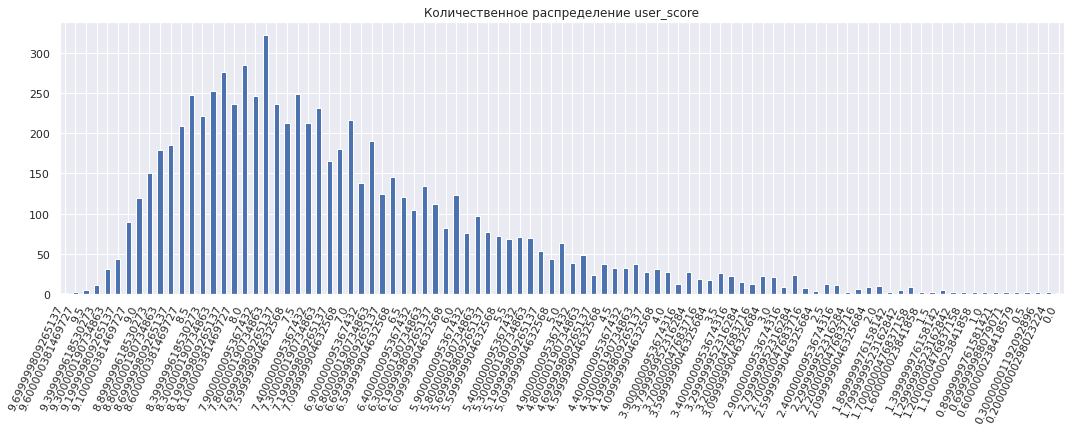

In [11]:
sns.set()
(data['user_score']
 .value_counts()
 .sort_index(ascending=False)
 .plot(kind='bar' ,figsize=(18,5))
 .set(title='Количественное распределение user_score')
);
plt.xticks(rotation=65, horizontalalignment='right');

In [12]:
data_tbd = data.query('user_score == "tbd"')
data_tbd

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Посчитаем суммарные продажи во всех регионах в отдельный столбец.

In [13]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales','other_sales']].sum(axis=1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


**Промежуточный вывод:** поменяла названия столбцов и тип данных в двух стобцах, также проверила на пропуски и проанализировала их. Сделала дополнительный столбец с общими продажами.

## шаг. Исследовательский анализ данных

Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

count    16446.000000
mean      2006.484616
std          5.877050
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

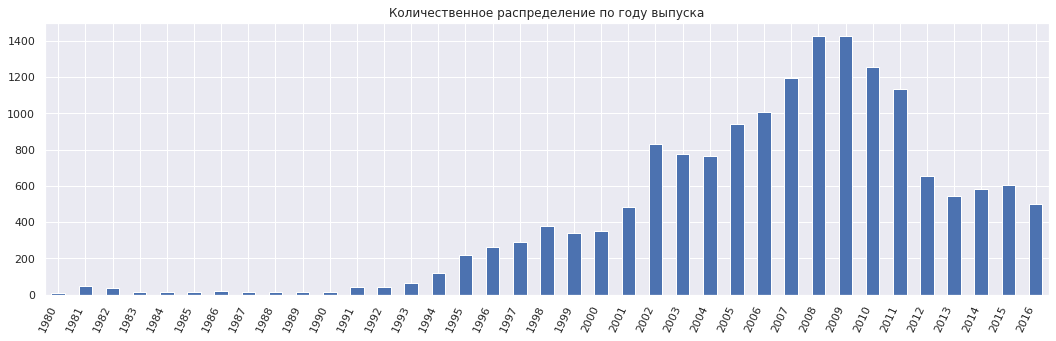

In [14]:
sns.set()
(data['year_of_release']
 .value_counts()
 .sort_index()
 .plot(kind='bar' ,figsize=(18,5))
 .set(title='Количественное распределение по году выпуска')
);
plt.xticks(rotation=65, horizontalalignment='right');

data['year_of_release'].describe()

Был пик в 1981, наверное технологический, что дало скачок в играх, потом спад. С  1991 по 2008 число выпускаемых игр в год увеличивалось. Отдельно хочу отметить пик 2002. С 2009 значения падают. Это не обязательно свидетельствует о кризисе, возможно производство игр усложнилось и теперь выходит меньше игр, но они более качественные. The Witcher 3: Wild Hunt вышел в 2015, например))

Данные за все годы не важны. Индустрия слишком изменчива. Пока я выбираю сфокусироваться на данных с 2003 (25 квартиль)

Теперь посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

In [15]:
data['platform'].value_counts()

PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

In [16]:
platform_sales_pivot = data.pivot_table(index='platform', values='total_sales', \
aggfunc='sum').sort_values(by='total_sales', ascending=False)
platform_sales_pivot

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


In [17]:
platform_sales_pivot_top10 = platform_sales_pivot.head(10)
platform_sales_pivot_top10 = platform_sales_pivot_top10.reset_index()

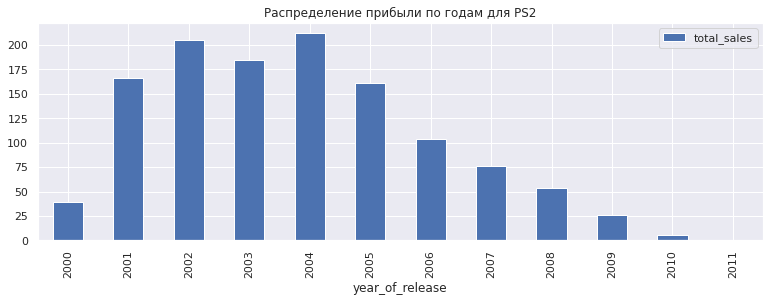

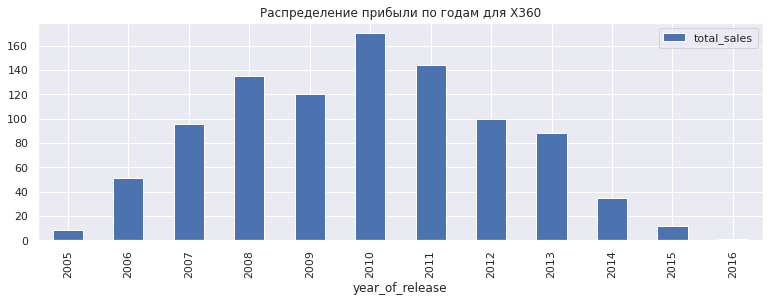

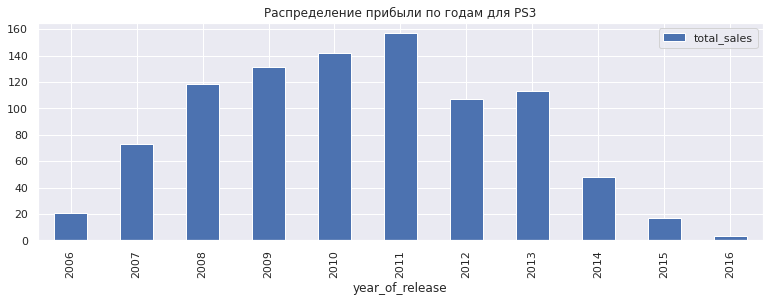

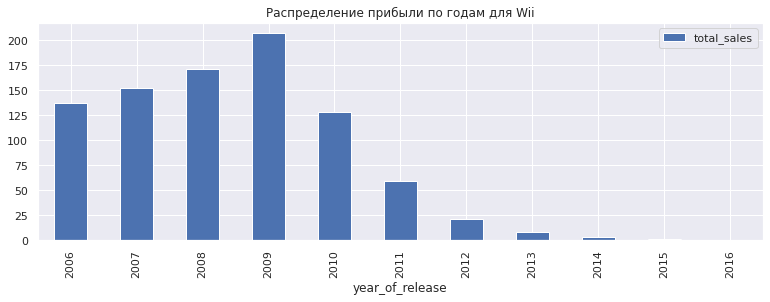

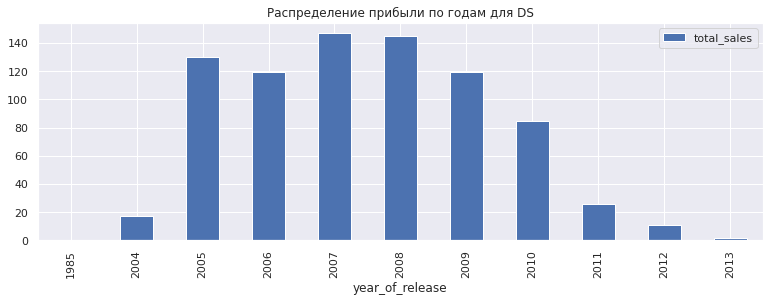

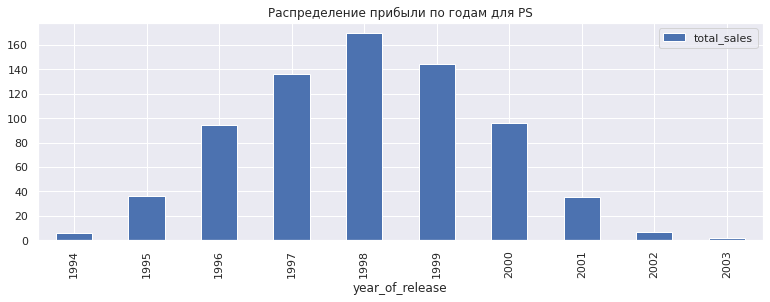

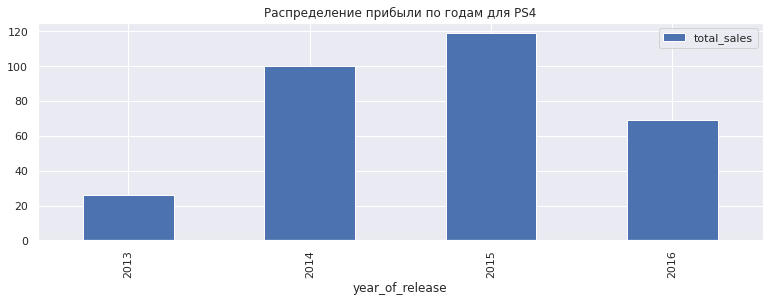

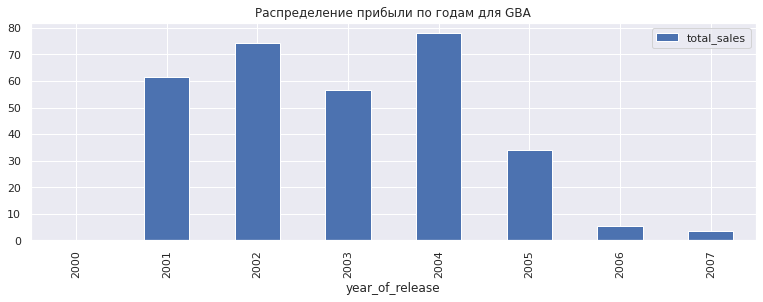

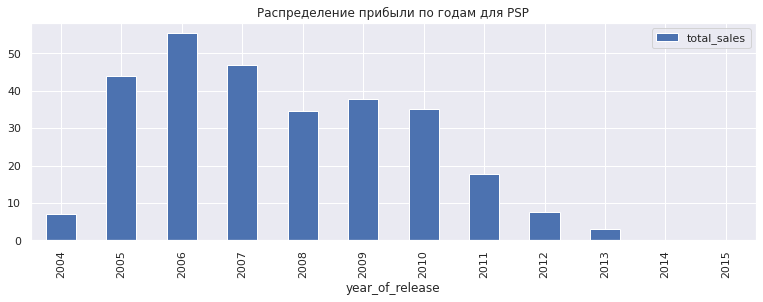

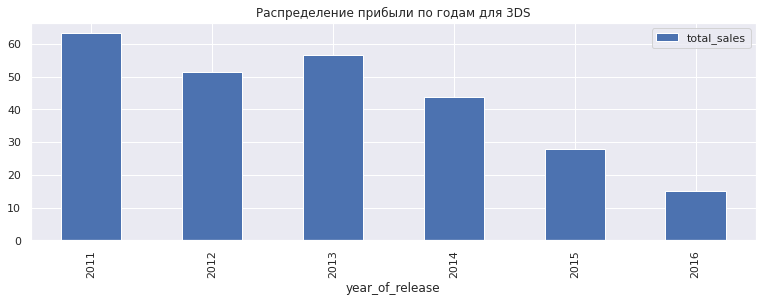

In [18]:
for platform in platform_sales_pivot_top10['platform']:
    data[data['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(
        kind='bar', figsize=(13,4))
    plt.title(f'Распределение прибыли по годам для {platform}') 

В среднем платформы живут по 8 лет. И на рынке всё-таки есть кризис, прибыль неукоснительно падает.

Возьмём данные за актуальный период. Сфера меняется быстро сосредоточимся на последних 2 годах. 
Какие платформы лидируют по продажам, растут или падают?

In [19]:
data_up_2015 = data.query('year_of_release >= 2015')

data_up_2015_pivot = data_up_2015.pivot_table(index='platform', values='total_sales', \
aggfunc='sum').sort_values(by='total_sales', ascending=False)
data_up_2015_pivot = data_up_2015_pivot.reset_index()
data_up_2015_pivot

,platform,total_sales
0,PS4,188.15
1,XOne,86.29
2,3DS,42.92
3,WiiU,20.95
4,PS3,20.42
5,PC,13.77
6,X360,13.48
7,PSV,10.50
8,Wii,1.32
9,PSP,0.12


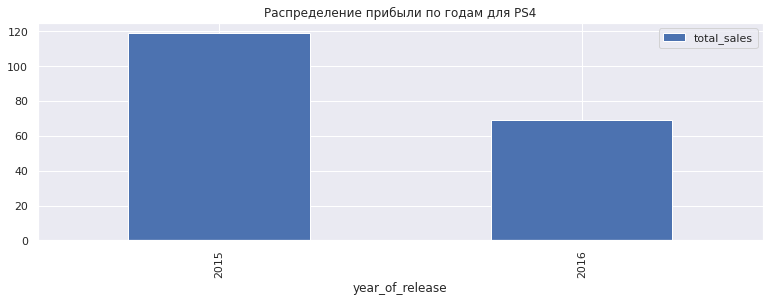

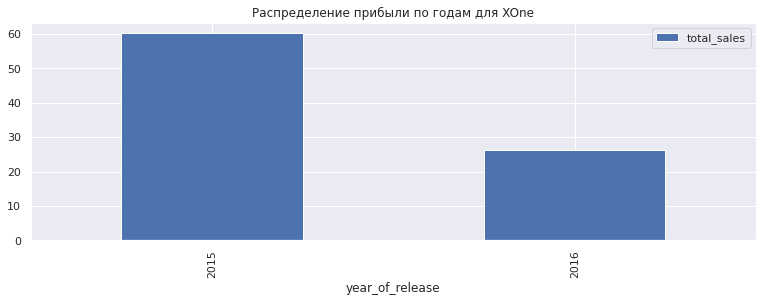

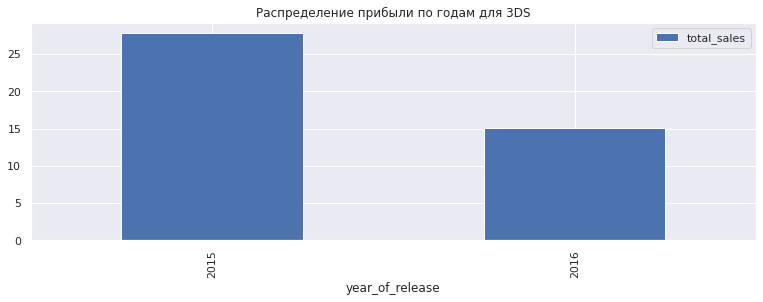

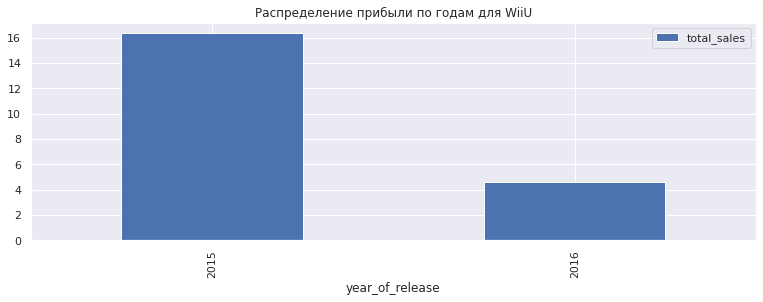

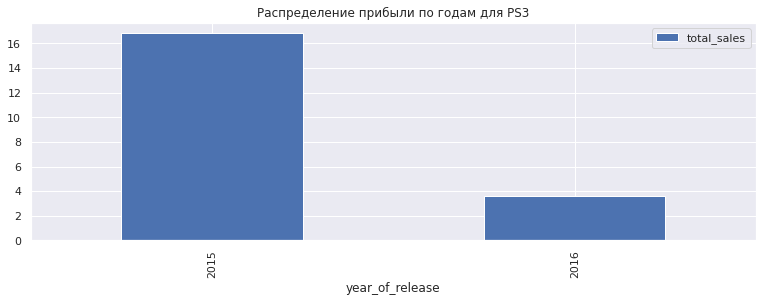

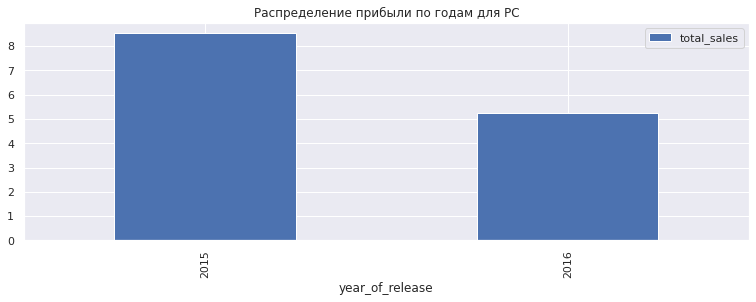

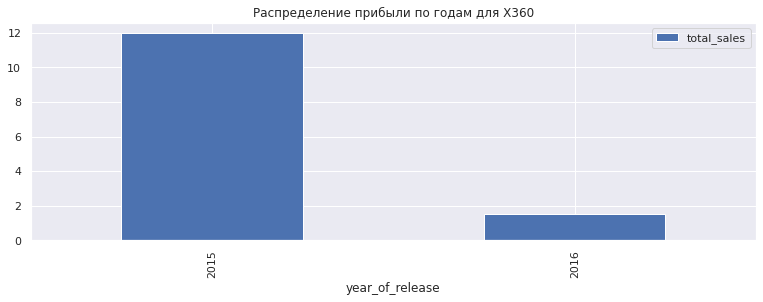

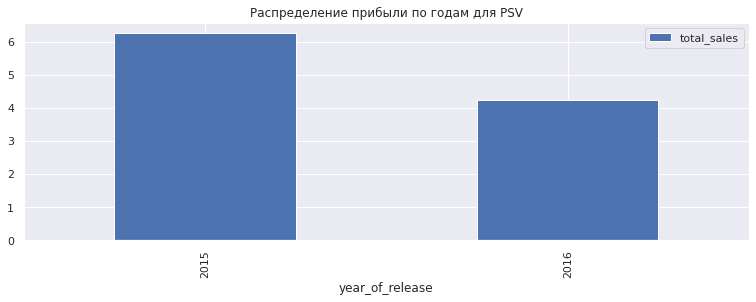

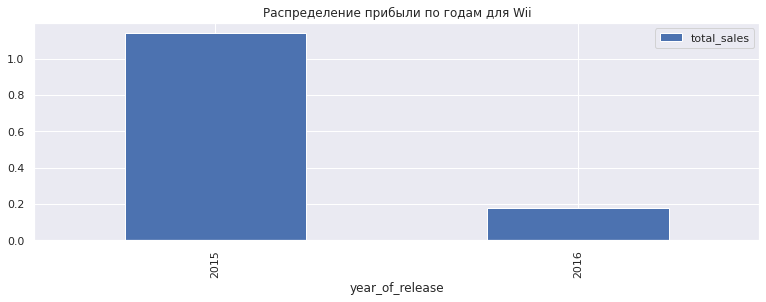

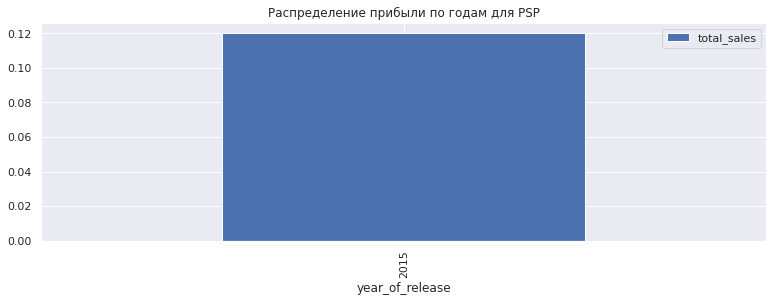

In [20]:
for platform in data_up_2015_pivot['platform']:
    data_up_2015[data_up_2015['platform'] == platform].pivot_table(index='year_of_release',
                                                                   values='total_sales', aggfunc='sum')\
    .plot(kind='bar', figsize=(13,4))
    plt.title(f'Распределение прибыли по годам для {platform}') 

Сначала построила графики по играм вышедшим после 2009, поэтому выводы более обширные расписала.

* PS3	неперспективная, показывает снижение продаж, это продолжится, так как вышла новая модель
* X360 стабильно снижались продажи и с 2016 года она практически исчезла
* Wii	стабильно снижались продажи и с 2015 года она практически исчезла
* **PS4**  перспективная, она вышла на рынок в 2013, но показывает рост в продажах. В 2016 продажи снизились, но это флагманская платформа, расти она будет.
* **3DS** продажи снижаются, но всё ещё важный игрок на рынке
* DS стабильно снижались продажи и с 2013 года она практически исчезла
* **XOne** перспективная, она вышла на рынок в 2013, но показывает рост в продажах. В 2016 продажи снизились, думаю, что это общее явление по рынку, расти она будет.
* **PC** продажи снижаются, но всё ещё важный игрок на рынке
* PSP стабильно снижались продажи и с 2014 года она практически исчезла
* **WiiU** продажи упали в 2016, но всё ещё важный игрок на рынке
* **PSV** продажи снижаются, но всё ещё важный игрок на рынке
* PS2 стабильно снижались продажи и с 2012 года она практически исчезла

Итого оставим для дальнейшего анализа следующие платформы: PS4, XOne, PC, WiiU, PSV, 3DS

Построим  «ящик с усами» по глобальным продажам игр в разбивке по платформам.

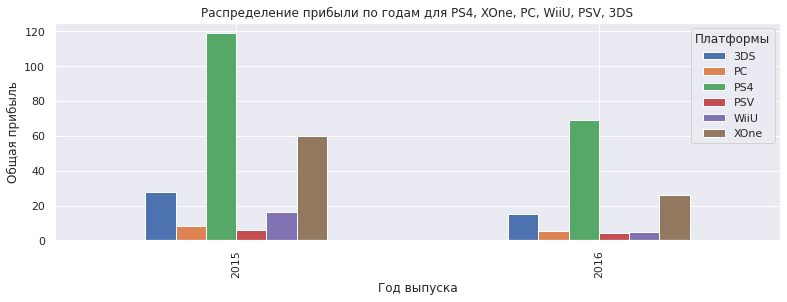

In [21]:
data_up_2015[data_up_2015['platform'].isin(['PS4', 'XOne', 'PC', 'WiiU', 'PSV', '3DS'])].pivot_table(
    index='year_of_release',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
).plot(kind='bar', figsize=(13,4))

plt.title('Распределение прибыли по годам для PS4, XOne, PC, WiiU, PSV, 3DS')
plt.xlabel('Год выпуска')
plt.ylabel('Общая прибыль')
plt.legend(title='Платформы')
plt.show()

In [22]:
games_top_5_platform = data_up_2015[data_up_2015['platform'].isin(['PS4','XOne','PC','WiiU','PSV', '3DS'])]
games_top_5_platform.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,132.0,0.325152,0.798620,0.01,0.030,0.090,0.2325,7.14
PC,104.0,0.132404,0.209449,0.01,0.020,0.050,0.1425,1.28
PS4,301.0,0.625083,1.457063,0.01,0.050,0.120,0.4200,14.63
PSV,195.0,0.053846,0.063669,0.01,0.020,0.030,0.0600,0.41
WiiU,42.0,0.498810,0.850240,0.01,0.050,0.215,0.5175,4.44
XOne,167.0,0.516707,0.965940,0.01,0.035,0.130,0.5550,7.39


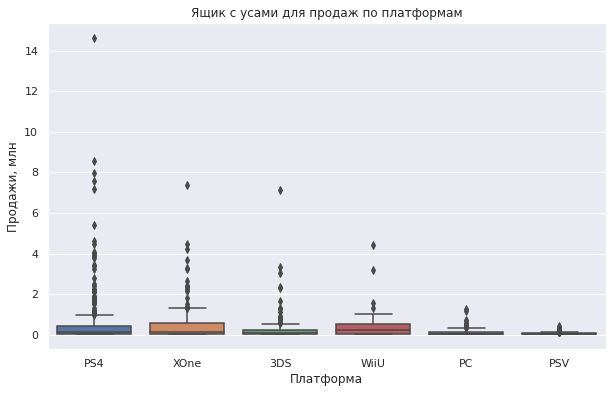

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=games_top_5_platform, x='platform', y='total_sales')

plt.title('Ящик с усами для продаж по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи, млн')
plt.show()

Не особо что понятно, надо сократить выбросы. Посмотрела на распределение, чтобы найти более точное решение, найду 90% квартиль, а потом отброшу лишние значения и ещё раз построю график

In [24]:
games_top_5_platform.groupby('platform')['total_sales'].quantile(0.9)

platform
3DS     0.750
PC      0.302
PS4     1.720
PSV     0.126
WiiU    1.028
XOne    1.340
Name: total_sales, dtype: float64

In [25]:
games_top_5_platform = games_top_5_platform[games_top_5_platform['total_sales']<2.1]

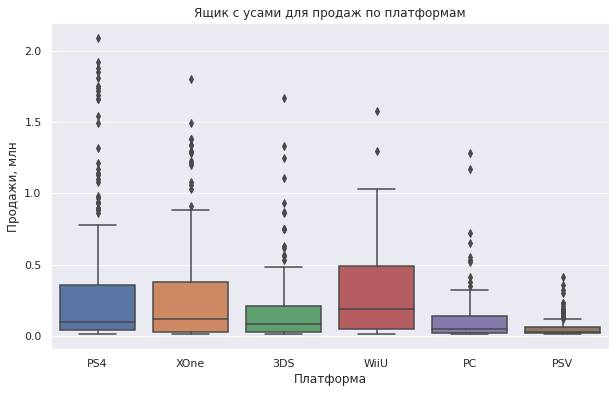

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=games_top_5_platform, x='platform', y='total_sales')

plt.title('Ящик с усами для продаж по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи, млн')
plt.show()

Медианы у всех разные, размах тоже. Выбросы есть также у всех, но у WiiU немного, а у PS4 уйма. По объёму продаж порядок такой (данные с 2009): XOne, WiiU, PS4, 3DS, PC , PSV.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Затем соотнесём выводы с продажами игр на других платформах.

In [27]:
def platform_score(name, games_top_5_platform):
    platform_data = games_top_5_platform.query('platform == @name')

    # График critic_score vs total_sales
    platform_data.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.6, color='green')
    plt.title(f'{name} - Критики', fontsize=15)
    plt.show()

    # Коэффициент корреляции для critic_score и total_sales
    critic_corr = platform_data['total_sales'].corr(platform_data['critic_score'])
    print(f'Коэффициент корреляции (Critic): {critic_corr}')

    # График user_score vs total_sales
    platform_data.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.6, color='blue')
    plt.title(f'{name} - Пользователи', fontsize=15)
    plt.show()

    # Коэффициент корреляции для user_score и total_sales
    user_corr = platform_data['total_sales'].corr(platform_data['user_score'])
    print(f'Коэффициент корреляции (User): {user_corr}')


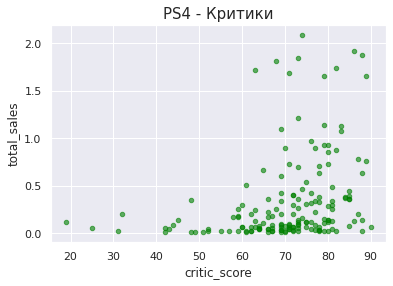

Коэффициент корреляции (Critic): 0.30910741488231663


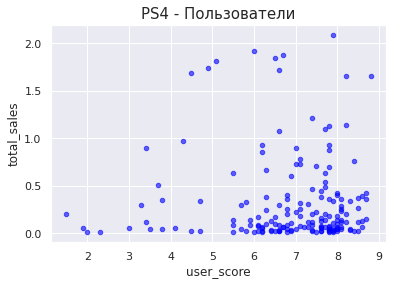

Коэффициент корреляции (User): -0.010781506231941893


In [28]:
platform_score('PS4', games_top_5_platform)

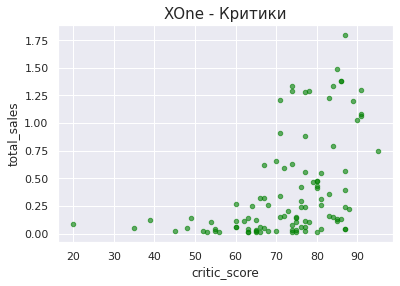

Коэффициент корреляции (Critic): 0.46745121433963105


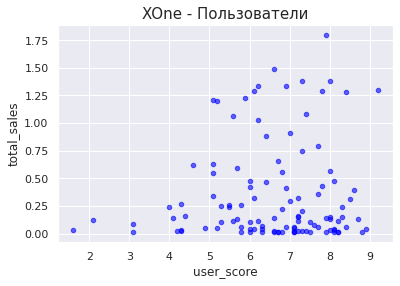

Коэффициент корреляции (User): 0.08927307837380231


In [29]:
platform_score('XOne', games_top_5_platform)

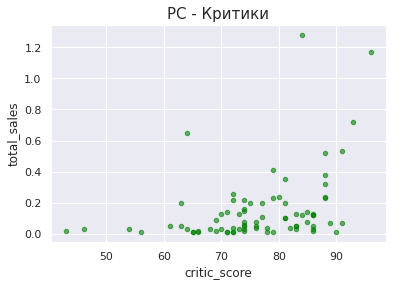

Коэффициент корреляции (Critic): 0.3773317477241351


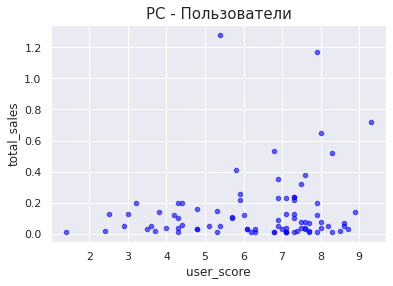

Коэффициент корреляции (User): 0.1503805445588292


In [30]:
platform_score('PC', games_top_5_platform)

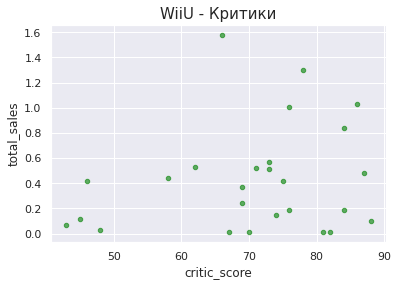

Коэффициент корреляции (Critic): 0.20377686103408646


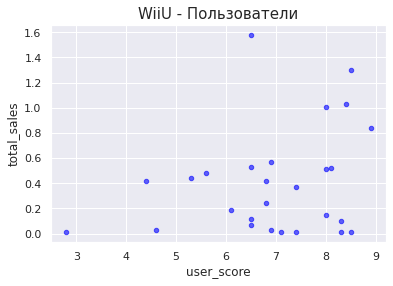

Коэффициент корреляции (User): 0.26056552115230236


In [31]:
platform_score('WiiU', games_top_5_platform)

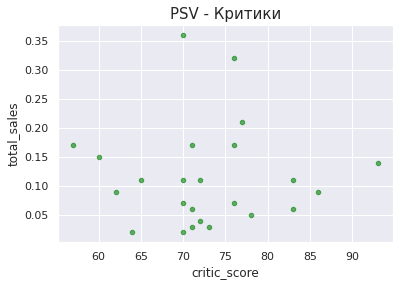

Коэффициент корреляции (Critic): 0.0036040833609397678


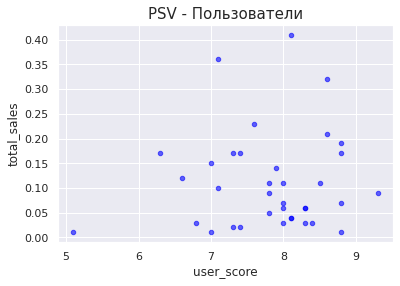

Коэффициент корреляции (User): 0.07833476754393341


In [32]:
platform_score('PSV', games_top_5_platform)

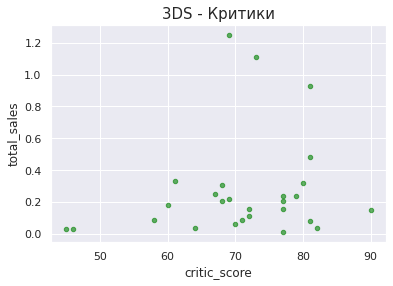

Коэффициент корреляции (Critic): 0.1821812725083842


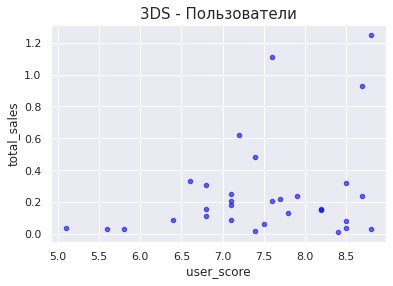

Коэффициент корреляции (User): 0.30117575955051146


In [33]:
platform_score('3DS', games_top_5_platform)

Практически у всех платформ мы можем наблюдать умеренную положительную линейную зависимость между оценками критиков и продажами. Она не является сильной, но все равно существует. 

При этом пользовательские оценки практически не влияют на продажи. Исключения, где влияние сопоставимо с оценками критиков: WiiU, 3DS 

Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [34]:
data_up_2015['genre'].value_counts()

Action          431
Role-Playing    132
Adventure       110
Sports          107
Shooter          81
Misc             71
Racing           42
Fighting         37
Simulation       33
Strategy         29
Platform         28
Puzzle            7
Name: genre, dtype: int64

In [35]:
genres_pivot = data_up_2015.pivot_table(index='genre', values='total_sales', \
aggfunc='sum').sort_values(by='total_sales', ascending=False)
genres_pivot = genres_pivot.reset_index()
genres_pivot

,genre,total_sales
0,Shooter,105.73
1,Action,102.13
2,Sports,64.33
3,Role-Playing,55.82
4,Misc,14.17
5,Fighting,12.37
6,Adventure,11.98
7,Racing,10.86
8,Platform,9.28
9,Simulation,7.55


In [36]:
genres_median = data_up_2015.pivot_table(index='genre', values='total_sales', \
aggfunc='median').sort_values(by='total_sales', ascending=False)
genres_median = genres_median.reset_index()
genres_median

,genre,total_sales
0,Shooter,0.380
1,Sports,0.120
2,Role-Playing,0.115
3,Platform,0.100
4,Simulation,0.100
5,Fighting,0.090
6,Action,0.060
7,Misc,0.060
8,Racing,0.055
9,Strategy,0.050


Высокие продажи могут быть вызваны не успехом, а просто огромным количеством игр. Вполне могут быть жанры, где игр немного, но при этом продажи сопоставимы с продажами Экшена. Чтобы проверить это, рассмотрела медианные продажи.

Топ жанров по популярности: Shooter, Action, Sports, Role-Playing, Misc

Топ жанров по прибыли: Shooter, Sports, Role-Playing, Platform, Simulation		

Выделяются жанры с высокимии низкими продажами. Например с Shooter ситуация понятная: он самый популярный и денег тоже больше всего приносит. А вот Action второй по популярности, по прибыли только на седьмом месте. У него низкие продажи. Platform наоборот, его даже нет в топ-5 популярных жанров, но по прибыли он на четвёртом месте. Это явно жанр с высокими продажами. 

**Промежуточный вывод:** 

Сколько игр выпускалось в разные годы: был пик в 1981, наверное технологический, что дало скачок в играх, потом спад. С 1991 по 2008 число выпускаемых игр в год увеличивалось. Отдельно хочу отметить пик 2002. С 2009 значения падают.

В среднем компании живут 8 лет. 

Перспективные компании  PS4, XOne, PC, WiiU, PSV, 3DS, хотя почти все показывают сокращение количества игр и прибыли.

Практически у всех платформ мы можем наблюдать умеренную положительную линейную зависимость между оценками критиков и продажами. Она не является сильной, но все равно существует.

При этом пользовательские оценки практически не влияют на продажи. Исключения, где влияние сопоставимо с оценками критиков: WiiU, 3DS

Топ жанров по популярности: Action, Misc, Sports, Adventure, Role-Playing 

Топ жанров по прибыли: Shooter, Sports, Role-Playing, Platform, Simulation

## шаг. Портрет пользователя каждого региона

Составим портрет пользователя каждого региона. Для этого необходимо:
Определить для пользователя каждого региона (NA, EU, JP):
* самые популярные платформы (топ-5)
* самые популярные жанры (топ-5)

In [37]:
games_up_2015 = data.query('year_of_release >= 2015')
games_up_2015 = games_up_2015\
            .pivot_table(['na_sales','eu_sales','jp_sales','other_sales','total_sales'], ['platform'], aggfunc='sum')\
            .sort_values(by='other_sales', ascending=False)
games_up_2015

,eu_sales,jp_sales,na_sales,other_sales,total_sales
platform,,,,,
PS4,83.54,12.05,63.86,28.70,188.15
XOne,28.10,0.18,50.30,7.71,86.29
PS3,7.30,4.97,5.66,2.49,20.42
3DS,7.39,23.55,10.31,1.67,42.92
WiiU,6.49,4.12,8.86,1.48,20.95
X360,4.21,0.00,8.05,1.22,13.48
PC,9.10,0.00,3.72,0.95,13.77
PSV,1.08,8.41,0.54,0.47,10.50
Wii,0.73,0.00,0.49,0.10,1.32


In [38]:
def market_share(row):
    eu_sales = row['eu_sales']
    jp_sales = row['jp_sales']
    na_sales = row['na_sales']
    other_sales = row['other_sales']
    total_sales  = row['total_sales']
    
    eu_share =  round(eu_sales / total_sales,2)
    jp_share =  round(jp_sales / total_sales,2)
    na_share =  round(na_sales / total_sales,2)
    other_share =  round(other_sales / total_sales,2)
    return pd.Series([eu_share, jp_share, na_share, other_share],\
                     index=['eu_share', 'jp_share', 'na_share', 'other_share'])

In [39]:
games_up_2015_market_share = games_up_2015.apply(market_share, axis = 1)

games_up_2015_market_share

,eu_share,jp_share,na_share,other_share
platform,,,,
PS4,0.44,0.06,0.34,0.15
XOne,0.33,0.00,0.58,0.09
PS3,0.36,0.24,0.28,0.12
3DS,0.17,0.55,0.24,0.04
WiiU,0.31,0.20,0.42,0.07
X360,0.31,0.00,0.60,0.09
PC,0.66,0.00,0.27,0.07
PSV,0.10,0.80,0.05,0.04
Wii,0.55,0.00,0.37,0.08


В Европе популярнее всего: PS4, XOne, PC, 3DS, WiiU

В Японии: 3DS, PS4, PSV, PS3, WiiU

В Северной Америке: PS4, XOne, 3DS, WiiU, X360

И в других странах: PS4, XOne, PS3, 3DS, WiiU

Европа и Америка похожи в предпочтених. В то время как в Японии рынок отличается значительно. Например, есть PSV которой нет в других топах. И лидирует не PS4, а 3DS.

Теперь посмотрим самые популярные жанры (топ-5). 

In [40]:
genres_up_2015 = data.query('year_of_release >= 2015')
genres_up_2015 = genres_up_2015\
            .pivot_table(['na_sales','eu_sales','jp_sales','other_sales','total_sales'], ['genre'], aggfunc='sum')\
            .sort_values(by='other_sales', ascending=False)
genres_up_2015

,eu_sales,jp_sales,na_sales,other_sales,total_sales
genre,,,,,
Shooter,40.28,3.79,48.18,13.48,105.73
Action,34.82,23.05,33.68,10.58,102.13
Sports,27.82,1.65,26.31,8.55,64.33
Role-Playing,17.21,13.41,19.82,5.38,55.82
Fighting,3.72,1.54,5.54,1.57,12.37
Adventure,4.67,2.22,3.84,1.25,11.98
Racing,6.52,0.29,2.82,1.23,10.86
Misc,4.26,3.19,5.58,1.14,14.17
Platform,3.20,1.42,3.78,0.88,9.28


В Европе популярнее всего: Shooter, Action, Sports, Role-Playing, Racing	

В Японии: Action, Role-Playing, Shooter, Misc, Adventure

В Северной Америке: Shooter, Action, Sports, Role-Playing, Misc

И в других странах: Shooter, Action, Sports, Role-Playing, Fighting

И опять отличается именно Японский рынок. Видимо разница менталитетов. Было бы инетересно посмотреть данные по другим странам Азии.

Давайте проверим, влияет ли рейтинг ESRB на продажи в отдельном регионе? Сначала я посмотрела за 2016 год. Но там было только 4 типа рейтинга из 8. Всё-таки рейтинги это тенденция в долгую, решила проанализировать с 2009 года. Но по большей части опять те же 4 оценки в том же порядке. 

Напомню расшифровку:
* «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. 
* «E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов 
* «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. 
* «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»

Связь между рейтингом и продажами есть. Для Европы, Америки и других стран больше всего прибыли приносят игры с рейтингом «M», поскольку именно там допускаются сцены насилия, а в этих странах популярны шутеры. В японии же основной рейтинг «T», игры в котором могут быть умеренно жестокими.

In [41]:
rating_up_2016 = data.query('year_of_release >= 2015')
rating_up_2016 = rating_up_2016\
            .pivot_table(['na_sales','eu_sales','jp_sales','other_sales','total_sales'], ['rating'], aggfunc='sum')\
            .sort_values(by='eu_sales', ascending=False)
rating_up_2016

,eu_sales,jp_sales,na_sales,other_sales,total_sales
rating,,,,,
M,45.54,4.29,47.03,14.24,111.10
E,34.83,5.25,26.59,8.57,75.24
T,20.32,7.70,22.86,6.85,57.73
E10+,11.54,3.27,17.87,4.00,36.68


In [42]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [43]:
rating_2009 = data.query('year_of_release >= 2009')
rating_2009 = rating_2009\
            .pivot_table(['na_sales','eu_sales','jp_sales','other_sales','total_sales'], ['rating'], aggfunc='sum')\
            .sort_values(by='eu_sales', ascending=False)
rating_2009

,eu_sales,jp_sales,na_sales,other_sales,total_sales
rating,,,,,
M,326.50,35.63,440.86,110.29,913.28
E,261.50,61.49,403.16,84.43,810.58
T,153.28,50.59,227.11,55.58,486.56
E10+,121.63,20.82,202.94,40.85,386.24
RP,0.03,0.00,0.00,0.01,0.04
EC,0.00,0.00,1.32,0.08,1.40


**Промежуточный вывод:** 
По приставкам:
* В Европе популярнее всего: PS4, XOne, PC, 3DS, WiiU
* В Японии: 3DS, PS4, PSV, PS3, WiiU
* В Северной Америке: PS4, XOne, 3DS, WiiU, PC
* И в других странах: PS4, XOne, 3DS, WiiU, PC

По жанрам:
* В Европе популярнее всего: Shooter, Action, Sports, Role-Playing, Racing	
* В Японии: Action, Role-Playing, Shooter, Misc, Adventure
* В Северной Америке: Shooter, Action, Sports, Role-Playing, Misc
* И в других странах: Shooter, Action, Sports, Role-Playing, Fighting

Европа и Америка похожи в предпочтених. В то время как в Японии рынок отличается значительно. 

Связь между рейтингом и продажами есть. Для Европы, Америки и других стран больше всего прибыли приносят игры с рейтингом «M», поскольку именно там допускаются сцены насилия, а в этих странах популярны шутеры. В японии же основной рейтинг «T», игры в котором могут быть умеренно жестокими.

## шаг. Проверка гипотез

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC отличаются.

In [44]:
alpha = 0.01

results = st.ttest_ind(data.query('platform == "PC" & year_of_release == 2016')['user_score'].dropna() ,\
                       data.query('platform == "XOne" & year_of_release == 2016')['user_score'].dropna())

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 
    
print()
print('Среднее значение пользовательских рейтингов платформы Xbox One', data.query('platform == "XOne" & year_of_release == 2016')['user_score'].dropna().mean())
print('Среднее значение пользовательских рейтингов платформы PC', data.query('platform == "PC" & year_of_release == 2016')['user_score'].dropna().mean())

p-значение: 0.339819251883264
Не получилось отвергнуть нулевую гипотезу

Среднее значение пользовательских рейтингов платформы Xbox One 6.598485
Среднее значение пользовательских рейтингов платформы PC 6.2977777


Так как нулевая гипотеза не была отвергнута, можно считать, что с высокой вероятностью средние пользовательские рейтинги платформ Xbox One и PC одинаковы

Теперь проверим вторую гипотезу.

Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports одинаковые.

Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports разные.

In [45]:
alpha = 0.01 

results = st.ttest_ind(data.query('genre == "Action" & year_of_release == 2016')['user_score'].dropna() ,\
                       data.query('genre == "Sports" & year_of_release == 2016')['user_score'].dropna())

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 
    
print()
print('Среднее значение пользовательских рейтингов жанра Action', data.query('genre == "Action" & year_of_release == 2016')['user_score'].dropna().mean())
print('Среднее значение пользовательских рейтингов жанра Sports', data.query('genre == "Sports" & year_of_release == 2016')['user_score'].dropna().mean())

p-значение: 0.0003474838332408742
Отвергаем нулевую гипотезу

Среднее значение пользовательских рейтингов жанра Action 6.6388235
Среднее значение пользовательских рейтингов жанра Sports 5.4324327


Нулевая гипотеза не была принята, следовательно средние пользовательские рейтинги жанров Action и Sports разные.
Я попробовала провести расчёты с alpha = 0.01 и с alpha = 0.05, результат был одинаковым. 

**Промежуточный вывод:** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action и Sports разные.

## шаг. Общий вывод

Я загрузила все необходимые библиотеки, выгрузила данные  и  ознакомилась с ними. Поняла, что требуется предобработка: поменяла названия всех столбцов приведя к нижнему регистру, сменила тип данных в двух стобцах, также проверила на пропуски и проанализировала их. Сделала дополнительный столбец с общими продажами.

Затем я приступила к исследовательскому анализу, где получила следующие выводы:
* Количество выпускаемых игр в разные годы: был пик в 1981 потом спад. С 1991 по 2008 показатели увеличивались. Отдельно хочу отметить пик 2002. А с 2009 по 2016 значения падают.
* В среднем компании живут 8 лет.
* Перспективные компании PS4, XOne, PC, WiiU, PSV, 3DS, хотя почти все показывают сокращение количества игр и прибыли.
* Практически у всех платформ мы можем наблюдать умеренную положительную линейную зависимость между оценками критиков и продажами. Она не является сильной, но все равно существует.
* При этом пользовательские оценки практически не влияют на продажи. Исключения, где влияние сопоставимо с оценками критиков: WiiU, 3DS
* Топ жанров по популярности: Action, Misc, Sports, Adventure, Role-Playing
* Топ жанров по прибыли: Shooter, Sports, Role-Playing, Platform, Simulation

В следующем шаге мы составляли портрет пользователя каждого региона. Европа и Америка похожи в предпочтениях. В то время как в Японии рынок отличается значительно.

По приставкам:
* В Европе популярнее всего: PS4, XOne, PC, 3DS, WiiU
* В Японии: 3DS, PS4, PSV, PS3, WiiU
* В Северной Америке: PS4, XOne, 3DS, WiiU, PC
* И в других странах: PS4, XOne, 3DS, WiiU, PC

По жанрам:
* В Европе популярнее всего: Shooter, Action, Sports, Role-Playing, Racing	
* В Японии: Action, Role-Playing, Shooter, Misc, Adventure
* В Северной Америке: Shooter, Action, Sports, Role-Playing, Misc
* И в других странах: Shooter, Action, Sports, Role-Playing, Fighting

В своей работе я проверила две гипотезы:
*  Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Гипотеза не была отвергнута

* Средние пользовательские рейтинги жанров Action и Sports разные.
Эта гипотеза была альтернативной. В её пользу была отвергнута нулевая гипотеза.

**Итого:** выходить с играми стоит на платформы PS4, XOne, PC, WiiU, PSV, 3DS. Лучше всего сосредоточиться на рынке Америки и Европы, они крупнее и похожи друг с другом. Предпочтительные жанры: Shooter, Sports, Action, Role-Playing, Racing и Fighting.

**Рекомендации:** Выяснить причину недостатка данных по рейтингам и если возможно исправить. Рынок игр Китая один из крупнейших, но он достаточно изолирован, поэтому согласна с решением не включать его в анализ, но точно  стоит рассмотреть данные по Южной Корее, это крупный рынок.